#     WATER QUALITY ANALYSIS AND PREDICTION  

<img src='waterquality.jpg' style="width:900px;height:500px"/>

<h3 style = "font-family: cursive;background-color:#ff99cc	">1.0.INTRODUCTION </h3>

* Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

<h3 style = "font-family: cursive;background-color:#ff99cc	">2.0. Objectives </h3>

* Analyse the datasets to determine which machine learning model is accurate for prediction.
* Classify whether the water is  portable or not 

<h3 style = "font-family: cursive;background-color:#ff99cc	">3.0 Dataset Information: </h3>
  
* The dataset can be downloaded using this [link](https://www.kaggle.com/adityakadiwal/water-potability).

**The characteristics variables includes the following**

1. **pH value**:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. **Hardness**:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids (Total dissolved solids - TDS)**:
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines**:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate**:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity**:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon**:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes**:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity**:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. **Potability**:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


<h3 style = "font-family: cursive;background-color:#ff99cc	">2.Loading and Checking the dataset: </h3>

In [1]:
#load the packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, roc_auc_score, roc_curve

In [5]:
#load the dataset
df= pd.read_csv("country_vaccinations.csv")

In [3]:
#check the columns
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [5]:
# display the dataset info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
#display the dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<h3 style = "font-family: cursive;background-color:#ff99cc	">3.Data Cleaning And Analysis: </h3>

In [7]:
#checking for the duplicates 
dup = df.duplicated().sum()
print('Any Duplicate Value:',dup)


Any Duplicate Value: 0


In [8]:
#checking for missing values 
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
# Replace the missing values 
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

<h4 style = "font-family: cursive;background-color:#ff99cc">Descriptive Basic Statistics </h4>

In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<h4 style = "font-family: cursive;background-color:#ff99cc">Correlation Plot Analysis </h4>

In [11]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


<AxesSubplot:>

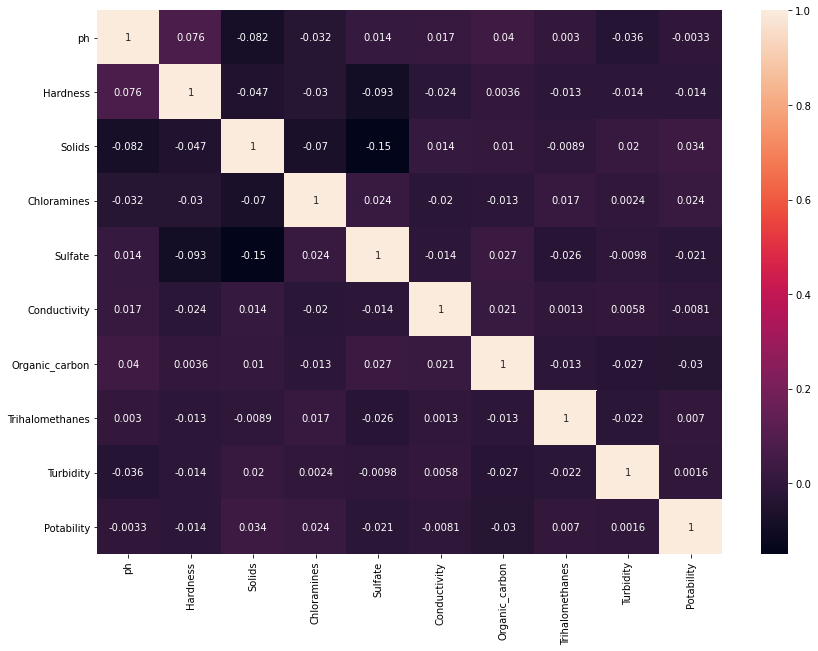

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

<h4 style = "font-family: cursive;background-color:#ff99cc">Portabilty Distribution </h4>

In [13]:
# display in pecentages 
df.Potability.value_counts()*100/len(df)

0    60.989011
1    39.010989
Name: Potability, dtype: float64

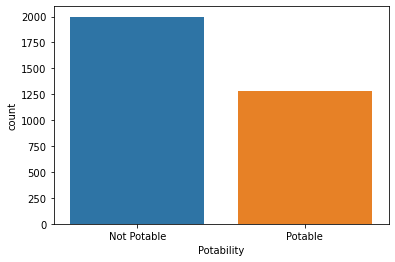

In [14]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

<h4 style = "font-family: cursive;background-color:#ff99cc">Variables Analysis </h4>

- Analysis with respect to portability distribution 

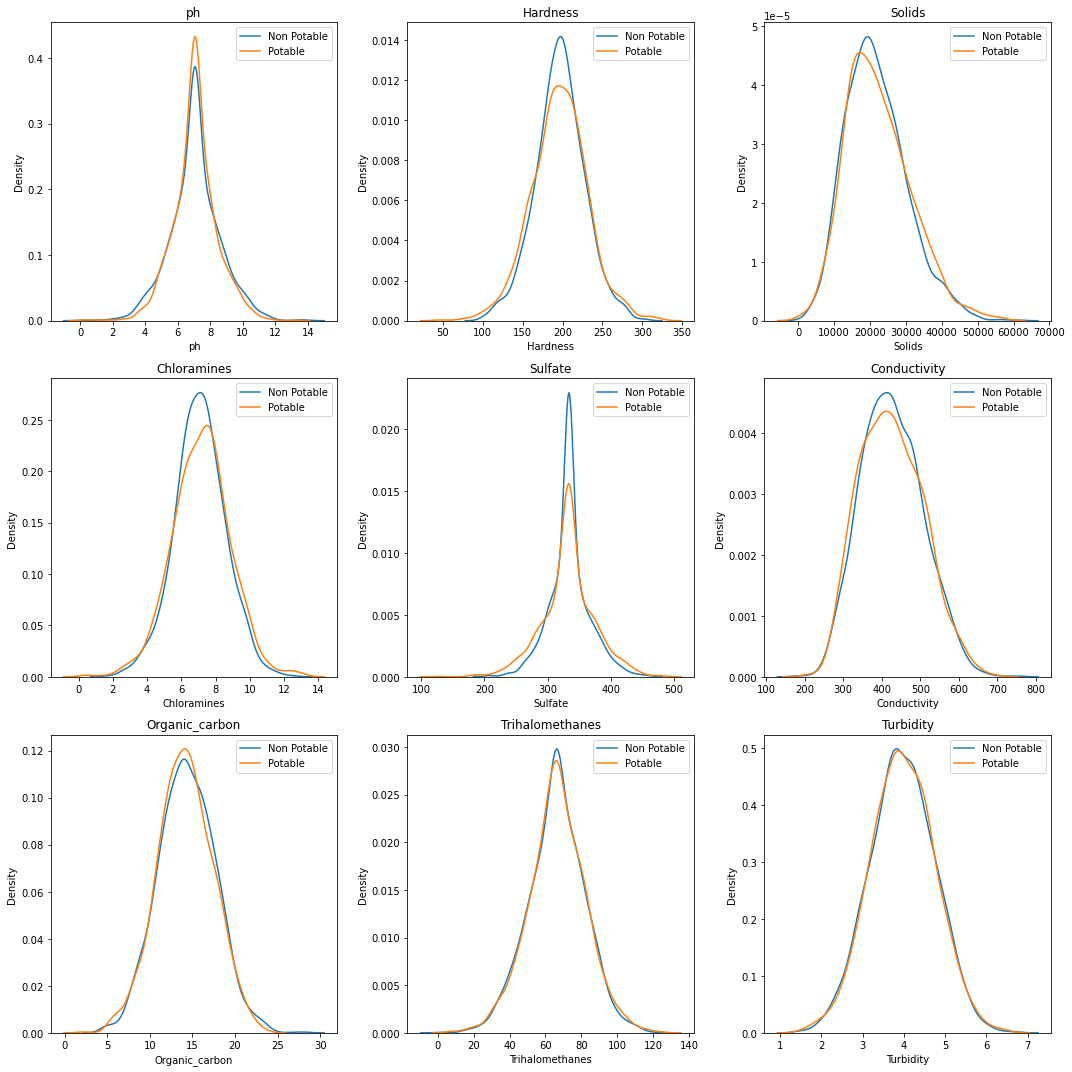

In [15]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

<h3 style = "font-family: cursive;background-color:#ff99cc"> 6.Split the Dataset  </h3>

In [16]:
x = df.drop(['Potability'],axis=True)
y = df['Potability']

x_train,x_test,y_train,y_test = tts(x,y,test_size=0.32, random_state = 50)

<h3 style = "font-family: cursive;background-color:#ff99cc"> 6.Model Classification </h3>

### Logistic Regression

In [110]:
LGR = LogisticRegression(max_iter = 120, random_state=0,n_jobs=20)
LGR.fit(x_train,y_train)
y_pred_LGR = LG.predict(x_test)


In [111]:
LGR_ACC = accuracy_score(y_test,y_pred_LGR)
LGR_ROC= roc_auc_score(y_test, y_pred_LGR)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_pred_RFC,y_test)*100, "%")
print(classification_report(y_pred_LGR,y_test))

The accuracy of Logistic Regression is :  65.49094375595806 %
              precision    recall  f1-score   support

           0       1.00      0.61      0.76      1049
           1       0.00      0.00      0.00         0

    accuracy                           0.61      1049
   macro avg       0.50      0.30      0.38      1049
weighted avg       1.00      0.61      0.76      1049



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


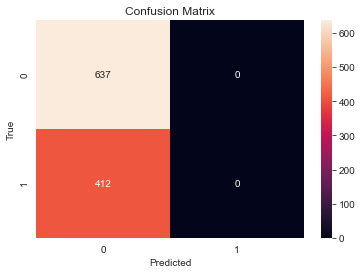

In [112]:
#confunsion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred_LGR),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

## Random Forest Classifier 

In [113]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred_RFC = RFC.predict(x_test)

In [114]:
RFC_ACC = accuracy_score(y_test,y_pred_RFC)
RFC_ROC= roc_auc_score(y_test, y_pred_RFC)
print ("The accuracy of Randon Forest classifier is : ", accuracy_score(y_pred_RFC,y_test)*100, "%")
print(classification_report(y_pred_RFC,y_test))

The accuracy of Randon Forest classifier is :  66.06291706387036 %
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       841
           1       0.32      0.63      0.43       208

    accuracy                           0.66      1049
   macro avg       0.60      0.65      0.59      1049
weighted avg       0.77      0.66      0.69      1049



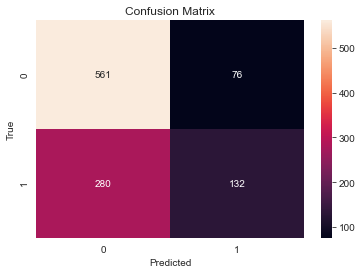

In [115]:
#confunsion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred_RFC),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

## Decision Tree

In [116]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
y_pred_DT = DT.predict(x_test)

In [117]:
DT_ACC = accuracy_score(y_test,y_pred_DT)
DT_ROC= roc_auc_score(y_test, y_pred_DT)
print("The accuracy of Decision Tree is : ", accuracy_score(y_pred_DT,y_test)*100, "%")
print(classification_report(y_pred_DT,y_test))

The accuracy of Decision Tree is :  57.38798856053384 %
              precision    recall  f1-score   support

         0.0       0.64      0.65      0.65       624
         1.0       0.47      0.46      0.47       425

    accuracy                           0.57      1049
   macro avg       0.56      0.56      0.56      1049
weighted avg       0.57      0.57      0.57      1049



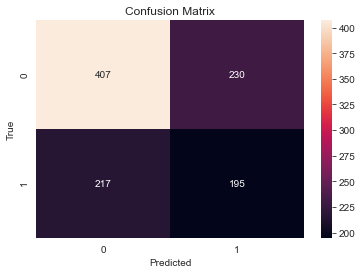

In [118]:
#confunsion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred_DT),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

## KNN

In [119]:
KNN = KNeighborsClassifier(n_neighbors= 9, leaf_size = 20)
KNN.fit(x_train,y_train)
y_pred_KNN =KNN.predict(x_test)

In [120]:
KNN_ACC = accuracy_score(y_test,y_pred_KNN)
KNN_ROC= roc_auc_score(y_test,y_pred_KNN)
print("The accuracy of K Nearest Neghbour is : ", accuracy_score(y_pred_KNN,y_test)*100, "%")
print(classification_report(y_test,y_pred_KNN))

The accuracy of K Nearest Neghbour is :  58.722592945662534 %
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       637
           1       0.46      0.27      0.34       412

    accuracy                           0.59      1049
   macro avg       0.54      0.53      0.52      1049
weighted avg       0.56      0.59      0.56      1049



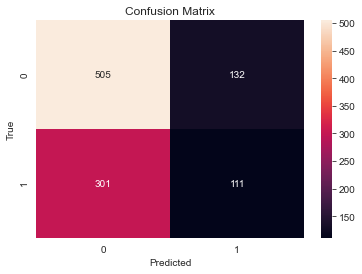

In [121]:
#confunsion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred_KNN),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

<h3 style = "font-family: cursive;background-color:#ff99cc"> 6.Model Comparison </h3>

In [122]:
models = pd.DataFrame({"Model":['K nearest neighbour','Logistic regression','Decision tree','Random forest'],
           "Accuracy":[KNN_ACC,LGR_ACC,DT_ACC,RFC_ACC]})
models

,Model,Accuracy
0,K nearest neighbour,0.587226
1,Logistic regression,0.607245
2,Decision tree,0.573880
3,Random forest,0.660629


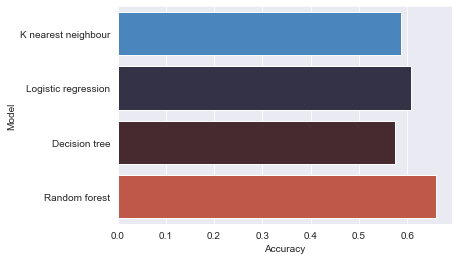

In [126]:

sns.barplot(y = 'Model', x = 'Accuracy', data=models,palette = 'icefire')
plt.xlabel("Accuracy")
plt.show()

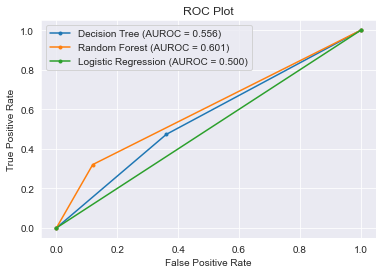

In [125]:
r_probs = [0 for _ in range(len(y_test))]

fpr_DT, tpr_DT, _ = roc_curve(y_test, y_pred_DT)
fpr_RFC, tpr_RFC, _ = roc_curve(y_test, y_pred_RFC)
fpr_kNN, tpr_kNN, _ = roc_curve(y_test, y_pred_KNN)
fpr_LG, tpr_LG, _ = roc_curve(y_test, y_pred_LGR)

sns.set_style('darkgrid')
plt.plot(fpr_DT, tpr_DT, marker='.', label='Decision Tree (AUROC = %0.3f)' % DT_ROC)
plt.plot(fpr_RFC, tpr_RFC, marker='.', label='Random Forest (AUROC = %0.3f)' % RFC_ROC)
plt.plot(fpr_LG, tpr_LG, marker='.', label='Logistic Regression (AUROC = %0.3f)' % LGR_ROC)


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()